# Document Similarity (English)

In this notebook, you will use the DocumentSimilarity tool to identify similar documents in the English language and decide whether to keep or remove them from the corpus.  

**Note:** this tool uses [MinHash](https://ekzhu.com/datasketch/minhash.html) to estimate the Jaccard similarity between sets of documents. MinHash is introduced by Andrei Z. Broder in this [paper](https://cs.brown.edu/courses/cs253/papers/nearduplicate.pdf).

<div class="alert alert-block alert-warning">
<b>User guide to using a Jupyter Notebook</b> 

If you are new to Jupyter Notebook, feel free to take a quick look at [this user guide](https://github.com/Australian-Text-Analytics-Platform/semantic-tagger/blob/main/documents/jupyter-notebook-guide.pdf) for basic information on how to use a notebook.
</div>

## 1. Setup
Before you begin, you need to import the DocumentSimilarity package and the necessary libraries and initiate them to run in this notebook.

In [1]:
# import the DocumentSimilarity tool
print('Loading DocumentSimilarity...')
from document_similarity import DocumentSimilarity, DownloadFileLink
import sys, os

os.chdir('../Juxtorpus/')

from juxtorpus.corpus import Corpus
from juxtorpus.corpus.processors import process
from juxtorpus.corpus.app import App
from juxtorpus.viz.corpus import timeline, timelines, wordcloud, wordclouds
from juxtorpus.viz.item_timeline import ItemTimeline
from juxtorpus.matchers import is_hashtag

from juxtorpus import Jux
from juxtorpus import analyse
from juxtorpus.corpus.corpora import Corpora

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# initialize the DocumentSimilarity
ds = DocumentSimilarity()
print('Finished loading.')

Loading DocumentSimilarity...


Loading BokehJS ...

Finished loading.


In [7]:
#corpora = Corpora()
corpora.widget()

In [ ]:
#ds.text_df.to_excel('../data/diabetes_test.xlsx', index=False)

In [ ]:
corpus = corpora['db']
corpus._df.head()

## 2. Load the data
This notebook will allow you to upload text data in a text file (or a number of text files). Alternatively, you can also upload text inside a text column inside your excel spreadsheet ([see an example here](https://github.com/Sydney-Informatics-Hub/HASS-29_Quotation_Tool/blob/main/documents/sample_texts.xlsx)).  

<table style='margin-left: 10px'><tr>
<td> <img src='./img/txt_icon.png' style='width: 45px'/> </td>
<td> <img src='./img/xlsx_icon.png' style='width: 55px'/> </td>
<td> <img src='./img/csv_icon.png' style='width: 45px'/> </td>
<td> <img src='./img/zip_icon.png' style='width: 45px'/> </td>
</tr></table>

<div class="alert alert-block alert-warning">
<b>Uploading your text files</b> 
    
If you have a large number of text files (more than 10MB in total), we suggest you compress (zip) them and upload the zip file instead. If you need assistance on how to compress your file, please check [the user guide](https://github.com/Australian-Text-Analytics-Platform/semantic-tagger/blob/main/documents/jupyter-notebook-guide.pdf) for more info. 
</div>

<div class="alert alert-block alert-danger">
<b>Large file upload</b> 
    
If you have ongoing issues with the file upload, please re-launch the notebook via Binder again. If the issue persists, consider restarting your computer.
</div>

In [ ]:
# upload the text files and/or excel spreadsheets onto the system
display(ds.upload_box)
print('Uploading large files may take a while. Please be patient.')
print('\033[1mPlease wait and do not press any buttons until the progress bar appears...\033[0m')

In [ ]:
ds.text_df = corpus._df
ds.text_df['text_name'] = corpus.meta.get('text_name').series
ds.text_df['text'] = ds.text_df['document']
ds.text_df = ds.hash_gen(ds.text_df)

In [ ]:
# display uploaded text
n=5

ds.text_df.head(n)

## 3. Calculate Document Similarity
Once your texts have been uploaded, you can begin to calculate the similarity between documents in the corpus. 

<div class="alert alert-block alert-info">
<b>Tools:</b>    

- MinHash: fast implementation of estimating Jaccard similarity between documents in the corpus.  
- Gensim: to tokenize the text.  
    
<b>Note:</b> in general, Gensim splits the text whenever whitespace or punctuation is encountered and digits are excluded, e.g., the text "Here's to victory no 2" will be tokenized into five tokens: "Here", "s", "to", "victory" and "no". For more information, please visit [this page](https://radimrehurek.com/gensim/utils.html#gensim.utils.tokenize).
</div>

<div class="alert alert-block alert-danger">
<b>Memory limitation in Binder</b> 
    
The free Binder deployment is only guaranteed a maximum of 2GB memory. Processing very large text files may cause the session (kernel) to re-start due to insufficient memory. Check [the user guide](https://github.com/Australian-Text-Analytics-Platform/semantic-tagger/blob/main/documents/jupyter-notebook-guide.pdf) for more info. 
</div>

<div class="alert alert-block alert-warning">
<b>Parameters for calculating similarity</b> 
    
The DocumentSimilarity tool uses Jaccard similarity to measure the similarity between documents. In the code below, we have specified and explained the default parameters for calculating the Jaccard similarity. However, you can also change these parameters should you wish. 
</div>

In [ ]:
# USER SPECIFIES THESE VARIABLES
# set the n-gram size (the number of words used to detect similarity), 
# e.g., n-gram=1 means compare every word ('apple' and 'orange'), 
# n-gram=2 means compare every pair of words ('one apple' and 'two oranges'), etc.
ngram_value = 1

# select whether to calculate actual or estimated Jaccard similarity 
# to measure the similarity between documents 
# we recommend using estimated Jaccard similarity for large corpus of documents (faster)
actual_jaccard = False # True or False

# whether to exclude punctuations when calculating Jaccard similarity
ds.exclude_punc = False # True or False

# set the number of permutation functions (num_perm) parameter for estimating Jaccard similarity
# higher permutation functions improves the accuracy, but also increases query cost
num_perm = 256

# anything with >= the cutoff will be identified as similar documents
similarity_cutoff = 0.5 # value should be between 0-1

In [ ]:
# begin the process of calculating similarity and identify similar documents
ds.text_df = ds.hash_gen(ds.text_df)
ds.calculate_similarity(ngram_value, num_perm, similarity_cutoff, actual_jaccard)

In [ ]:
corpus._df.head()

## 3. Analyse similar documents
Once the tool has finished calculating the document similarity, you can begin to analyse the outcome.  

The graph below is a histogram of the count of similar documents in the corpus as measured by their Jaccard similarity. In this histogram, you can identify how many documents are found at different level of similarity measures.

<div class="alert alert-block alert-warning">
<b>Histogram of similar documents</b> 
    
The x-axis on the histogram shows the Jaccard similarity scores for every document in the corpus, and the y-axis (the height of the bar) tells us how many similar documents are found at those Jaccard similarity score ranges. 
</div>

In [ ]:
# plot the similarity count accross the entire corpus
ds.plot_hash_similarity_by_source(ds.deduplication_df)

<div class="alert alert-block alert-warning">
<b>Heatmap of similar documents</b> 
    
The below heatmap shows the Jaccard similarity scores between pair of similar documents, with the x- and y-axes showing the text_id of the similar document pairs (you can hover over the similar nodes to display the text name pairs). Please note that the heatmap only displays pair of similar documents with scores above the similarity cut-off, as defined earlier.  
</div>  

<div class="alert alert-block alert-danger">
<b>Large number of similar documents</b> 
    
You can resize the heatmap, adjust the font size or the font color to better visualize your data by specifying the below parameters. You can also zoom in/out of the heatmap, move it around, save and download it to your local computer using the interactive tool on the right hand-side of the heatmap.  

<b>Note:</b> visualizing a large number of similar document pairs (**>500**) may slow down the notebook.   
</div>
<div class="alert alert-block alert-info">
<b>Input before plotting</b> 
    
To avoid plotting oversized figure, the user is asked to **specify the range** of matched documents to be included in the heatmap.
Entering **'n'** will cancel the figure generation.
Entering **'y'** will proceed with **all pairs** of similar documents.
Entering an **integer number**, such 30, will generate the figure with the top-30 pairs of the similar documents.
Entering a number range like **15-45** will generate the figure with the selected range (15 to 45) of the document pairs.
    
**Press Enter Key after inputting.**
</div>

In [ ]:
# define the plot width, height, font size and color
plot_width = 900 # increase plot width if necessary
plot_height = 800 # increase plot height if necessary
font_size = '14px'
text_color = 'white' # 'black' or 'white' would usually work for most scenarios

print('\033[1mVisualizing a large number of similar document pairs (>500) may slow down the notebook.\033[0m')
print('There are \033[1m{}\033[0m document pairs in the current process'.format(ds.deduplication_df.shape[0]))
plot_range = input("""Enter the range of documents pairs to be plotted, e.g. y, n, 10-25, or 30.\n""")

# plot heatmap of Jaccard similarity
ds.plot_heatmap_similarity(similarity_cutoff,
                                plot_width,
                                plot_height,
                                font_size,
                                text_color,
                                plot_range)

<div class="alert alert-block alert-warning">
<b>Analyse similar documents</b> 

Below you can generate a list of similar documents (in pairs) found by the tool, based on the similarity cutoff specified earlier. By default, the tool makes recommendations on whether to 'keep' or 'remove' each similar document (the tool will recommend to remove the document with the lower word count, if the Jaccard similarity is above the specified threshold). However, using the below tool, you can generate each pair of similar documents (by specifying the row index you wish to analyse), analyse them, and update the action/recommendation as you see fit.
</div>

<div class="alert alert-block alert-danger">
<b>Similar documents table</b> 

The table below displays only those texts identified as similar based on the Jaccard similarity cut-off selected earlier and the number of texts included in the table display therefore also informs you how many texts in your corpus are identified as within the cut-off threshold.
</div>

In [ ]:
ds.display_deduplication_text()

## Privacy policy comparison
# Use the similarity tool and Juxtorpus to compare updates in privacy policy.

In [3]:
# Upload the privacy policy corpus of selected categories: media and gamble
# corpora = Corpora()
corpora.widget()

In [2]:
# Load the testing privacy data from here.
corpora = Corpora()
df = pd.read_excel('../data/privacy_lite.xlsx')
corpus = Corpus.from_dataframe(df, col_doc='text', name='pp')
corpora.add(corpus)

In [5]:
ds_pp = DocumentSimilarity()
corpus = corpora['pp']
ds_pp.text_df = corpus._df.copy()
ds_pp.text_df['text_name'] = corpus.meta.get('version').series.astype(str) + '_' + corpus.meta.get('site_hostname').series.astype(str)
ds_pp.text_df['text'] = ds_pp.text_df['document']
ds_pp.text_df['text_id'] = ds_pp.text_df['text_name']
#ds_pp.text_df = ds_pp.hash_gen(ds_pp.text_df)

In [6]:
# USER SPECIFIES THESE VARIABLES
# set the n-gram size (the number of words used to detect similarity), 
# e.g., n-gram=1 means compare every word ('apple' and 'orange'), 
# n-gram=2 means compare every pair of words ('one apple' and 'two oranges'), etc.
ngram_value = 1

# select whether to calculate actual or estimated Jaccard similarity 
# to measure the similarity between documents 
# we recommend using estimated Jaccard similarity for large corpus of documents (faster)
actual_jaccard = False # True or False

# whether to exclude punctuations when calculating Jaccard similarity
ds_pp.exclude_punc = False # True or False

# set the number of permutation functions (num_perm) parameter for estimating Jaccard similarity
# higher permutation functions improves the accuracy, but also increases query cost
num_perm = 256

# anything with >= the cutoff will be identified as similar documents
similarity_cutoff = 0.99 # value should be between 0-1

In [7]:
ds_pp.calculate_similarity(ngram_value, num_perm, similarity_cutoff, actual_jaccard)

keep = abs(ds_pp.deduplication_df.text_name1.apply(lambda n: n.split('_',1)[0]).astype(int) - ds_pp.deduplication_df.text_name2.apply(lambda n: n.split('_',1)[0]).astype(int))==1
ds_pp.deduplication_df = ds_pp.deduplication_df[keep]
ds_pp.deduplication_df.shape

1120 pair of similar documents found in the corpus.


(318, 9)

In [9]:
# define the plot width, height, font size and color
plot_width = 900 # increase plot width if necessary
plot_height = 800 # increase plot height if necessary
font_size = '14px'
text_color = 'white' # 'black' or 'white' would usually work for most scenarios

print('\033[1mVisualizing a large number of similar document pairs (>500) may slow down the notebook.\033[0m')
print('There are \033[1m{}\033[0m document pairs in the current process'.format(ds_pp.deduplication_df.shape[0]))
plot_range = input("""Enter the range of documents pairs to be plotted, e.g. y, n, 10-25, or 30.\n""")

# plot heatmap of Jaccard similarity
ds_pp.plot_heatmap_similarity(similarity_cutoff,
                                plot_width,
                                plot_height,
                                font_size,
                                text_color,
                                plot_range)

Visualizing a large number of similar document pairs (>500) may slow down the notebook.
There are 318 document pairs in the current process


Enter the range of documents pairs to be plotted, e.g. y, n, 10-25, or 30.
 200



You can hover over the similar nodes to display the text name pairs.



In [ ]:
ds_pp.display_deduplication_text()

In [4]:
import re
import difflib

def diff_corpus(corpus, group_col, order_col):
    df = corpus.to_dataframe()
    #df = df.drop(['word_count'], axis=1, errors='ignore')
    rm_df = df.copy()
    add_df = df.copy()
    rm_list = []
    add_list = []
    for gn, g in df.groupby(group_col):
        g = g.sort_values(order_col, ascending=True)
        for idx, s in g[order_col].items():
            if s == g[order_col].min():
                corpus._df.loc[idx, 'add'] = ''
                corpus._df.loc[idx, 'rm'] = ''
                rm_df.loc[idx, 'document'] = ''
                add_df.loc[idx, 'document'] = ''
                prev_text = g.loc[idx, 'document']
                continue
            curr_text = g.loc[idx, 'document']
            rm_df.loc[idx, 'document'], add_df.loc[idx, 'document'] = diff_texts(prev_text, curr_text)
            corpus._df.loc[idx, 'add'] = add_df.loc[idx, 'document']
            corpus._df.loc[idx, 'rm'] = rm_df.loc[idx, 'document']
            prev_text = curr_text
    
    rm_corpus = Corpus.from_dataframe(rm_df, col_doc='document', name=corpus.name+'_rm')
    add_corpus = Corpus.from_dataframe(add_df, col_doc='document', name=corpus.name+'_add')
    #return rm_df, add_df
    return rm_corpus, add_corpus, corpus
    
    
# whitespace = re.compile(r'\s+')
# t1 = whitespace.split(corpus._df.loc[corpus._df.text_name == 'V14N002', 'text'].values[0])
# t2 = whitespace.split(corpus._df.loc[corpus._df.text_name == 'H14N002', 'text'].values[0])

def diff_texts(t1, t2):
    whitespace = re.compile(r'\s+')
    t1 = whitespace.split(t1)
    t2 = whitespace.split(t2)
    d = difflib.Differ()
    result = d.compare(t1,t2)
    #from pprint import pprint
    #pprint(''.join(result))
    seqmatcher = difflib.SequenceMatcher(isjunk=None, a=t1, b=t2, autojunk=False)
    out_rm, out_add = [], []
    for tag, a0, a1, b0, b1 in seqmatcher.get_opcodes():
        #markup = default_mark if tag == 'equal' else mark
        if tag == 'equal':
            continue
        #print(a0, a1, t1[a0:a1+1], b0, b1, t2[b0: b1+1])
        if tag == 'delete':
            out_rm += t1[a0:a1+1]
        if tag == 'insert':
            out_add += t2[b0:b1+1]
        if tag == 'replace':        
            out_rm += t1[a0:a1+1]
            out_add += t2[b0:b1+1]
    return ' '.join(out_rm), ' '.join(out_add)


In [5]:
corpus_rm, corpus_add, updated_corpus = diff_corpus(corpus, 'site_hostname', 'version')

In [6]:
corpora.add([corpus_rm, corpus_add])

In [8]:
corpus.to_dataframe().sample(5)

document  \
156  The Epoch Times - Privacy Notice\n\nWe take se...   
353  Privacy | FanDuel\n\nFanDuel recognizes that i...   
180  Forbes.com\n\nFORBES.COM PRIVACY STATEMENT\n\n...   
362  Privacy Policy : NPR\n\nNPR Online Privacy Pol...   
306  FreeSlots.com - Privacy Policy\n\n\n\nSlots Ho...   

                                                   add  \
156                                - Privacy Notice We   
353                                                      
180  Forbes.com FORBES.COM May 1, 2005 Forbes.com c...   
362                                                      
306  Slots Home Free Slots 1 Free Slots 2 Free Slot...   

                                                    rm  alexa_rank  \
156                               Privacy Notice | The     13214.0   
353                                                        48901.0   
180  November18, 2005 other than as provided herein...         NaN   
362                                                          840.0   
306                                                        89470.0   

         Category  flesch_kincaid phase                      policy_title  \
156  newsandmedia           15.89     A  The Epoch Times - Privacy Notice   
353      gambling           14.44     A                 Privacy | FanDuel   
180  newsandmedia           13.37     A                        Forbes.com   
362  newsandmedia           14.33     B              Privacy Policy : NPR   
306      gambling           12.07     A    FreeSlots.com - Privacy Policy   

         site_hostname           timestamp  word_count  year  version  
156  theepochtimes.com 2017-06-13 02:16:36        2806  2017        6  
353        fanduel.com 2012-05-12 08:56:54        1552  2012       16  
180         forbes.com 2005-06-26 07:40:26        1933  2005       17  
362            npr.org 2019-12-31 18:33:34        6432  2019        1  
306      freeslots.com 2017-06-06 06:44:17        2581  2017        6

In [9]:
# DTM based compare function

from juxtorpus.corpus.meta import SeriesMeta

def doc_compare(corpus, prev_idx, curr_idx):
    vocab = corpus.dtm.term_names
    dtm = corpus.dtm.matrix[[curr_idx, prev_idx], :].astype(bool)
    new_idx = (dtm[0,:]>dtm[1,:]).indices
    rm_idx = (dtm[0,:]<dtm[1,:]).indices
    new_dict = dict(zip(vocab[new_idx], corpus.dtm.matrix[curr_idx,new_idx].toarray().flatten()))
    rm_dict = dict(zip(vocab[rm_idx], corpus.dtm.matrix[prev_idx,rm_idx].toarray().flatten()))
    return new_dict, rm_dict
    

s = corpus.meta.get('version').series.copy()
for i,_ in s.items():
    s[i] = {}

newMeta = SeriesMeta(id_ = 'newwords', series=s.copy())
rmMeta = SeriesMeta(id_ = 'rmwords', series=s.copy())

sites = corpus.meta.get('site_hostname').series.values

for s in sites:
    site_corpus = corpus.slicer.filter_by_item('site_hostname', s)
    vers = site_corpus.meta.get('version').series.sort_values(ascending=True)
    for idx, ver in vers.items():
        if ver == 1:
            prev_idx = idx
            continue
        newMeta.series[idx], rmMeta.series[idx] = doc_compare(corpus, idx, prev_idx)
        prev_idx = idx
corpus.add_meta(newMeta)
corpus.add_meta(rmMeta)


In [ ]:
# Freqtable based compare function - 6 time slower than DTM based.
# from juxtorpus.corpus.meta import SeriesMeta
# s = corpus.meta.get('version').series.copy()
# for i,_ in s.items():
#     s[i] = {}

# newMeta = SeriesMeta(id_ = 'newwords', series=s.copy())
# rmMeta = SeriesMeta(id_ = 'rmwords', series=s.copy())

# sites = corpus.meta.get('site_hostname').series.values

# for s in sites:
#     site_corpus = corpus.slicer.filter_by_item('site_hostname', s)
#     vers = site_corpus.meta.get('version').series.sort_values(ascending=True)
#     for idx, ver in vers.items():
#         if ver == 1:
#             prev = site_corpus.slicer.filter_by_item('version', ver).freq_table()
#             continue
#         curr = site_corpus.slicer.filter_by_item('version', ver).freq_table()
#         newMeta.series[idx] = { k:curr[k] for k in curr.keys() if k not in prev.keys()}
#         rmMeta.series[idx] = { k:prev[k] for k in prev.keys() if k not in curr.keys()}
# corpus.add_meta(newMeta)
# corpus.add_meta(rmMeta)
# corpus.meta         

In [10]:
corpus.to_dataframe()

document  \
0    Two Plus Two Forums Privacy Policy\n\nThis pri...   
1    BBC - Privacy Policy\n\nPrivacy Policy\nThe fo...   
2    NASA Sportsbook - Offshore Betting\n\nBetUS.co...   
3    BBC - Privacy and Cookies Policy\n\n1. Introdu...   
4    Two Plus Two Forums Privacy Policy\n\nThis pri...   
..                                                 ...   
560  FreeSlots.com - Privacy Policy\n\n\n\nSlots Ho...   
561  Privacy Policy | FanDuel\n\nOur Privacy Policy...   
562  Privacy Policy\n\nThank you for visiting the F...   
563  BetUS Privacy and Security Policy\n\nBetUS.com...   
564  Privacy Policy\n\nBetUS.com firmly believes th...   

                                                   add  \
0                                                        
1    (eg name newsletters and competitions, live ch...   
2                                                        
3                                                        
4                                                        
..                                                 ...   
560                                                      
561  Our Privacy Policy has been updated as of Octo...   
562                                                      
563                                                      
564                                                      

                                                    rm  alexa_rank  \
0                                                           5002.0   
1    (e.g. name newsletters, competitions, "Alert E...         NaN   
2                                                              NaN   
3                                                             47.0   
4                                                           3877.0   
..                                                 ...         ...   
560     Free Slots 5 Multi-Payline Video Poker Winners         NaN   
561  Last Update Posted: April 18, 2016 1. Introduc...      1164.0   
562                                                         7473.0   
563                                                            NaN   
564                                                            NaN   

         Category  flesch_kincaid phase                        policy_title  \
0        gambling           13.15     A  Two Plus Two Forums Privacy Policy   
1    newsandmedia            7.41     B                BBC - Privacy Policy   
2        gambling           10.98     B  NASA Sportsbook - Offshore Betting   
3    newsandmedia           12.91     A    BBC - Privacy and Cookies Policy   
4        gambling           13.15     A  Two Plus Two Forums Privacy Policy   
..            ...             ...   ...                                 ...   
560      gambling           14.41     B      FreeSlots.com - Privacy Policy   
561      gambling           16.50     B            Privacy Policy | FanDuel   
562      gambling           14.63     A                      Privacy Policy   
563      gambling           12.15     A   BetUS Privacy and Security Policy   
564      gambling           11.81     B                      Privacy Policy   

      site_hostname           timestamp  word_count  year  version  \
0    twoplustwo.com 2009-06-18 12:31:07        2290  2009       22   
1         bbc.co.uk 2002-12-08 09:31:35        1496  2002       18   
2         betus.com 2003-12-06 07:29:54         240  2003       26   
3         bbc.co.uk 2009-06-19 21:03:00        2605  2009        6   
4    twoplustwo.com 2011-06-26 02:31:06        2290  2011       18   
..              ...                 ...         ...   ...      ...   
560   freeslots.com 2004-12-29 08:27:24        1159  2004       30   
561     fanduel.com 2015-12-23 22:47:05        1807  2015        9   
562  flalottery.com 2011-05-21 09:13:17         278  2011       18   
563       betus.com 2012-06-21 12:23:45         230  2012       11   
564       betus.com 2006-12-14 18:21:03         225  2006       22   

                     

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
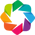

Row
    [0] Column
        [0] Row
            [0] Select(name='Category', options=['gambling', '...], value='newsandmedia')
            [1] MultiSelect(name='Websites', options=['aol.com', 'bbc.co.uk', ...], value=['bbc.co.uk', ...])
            [2] MultiSelect(name='Year', options=[1999, 2000, 2001, ...], value=[2002, 2009, 2013, ...])
        [1] ParamFunction(function, _pane=HoloViews)
    [1] ParamFunction(function, _pane=HoloViews)

In [11]:
# Working - Dropdown interaction - No change. 
import panel as pn
import panel.widgets as pnw
import holoviews as hv
from holoviews import opts, dim
from bokeh.palettes import Category20c
from bokeh.models import HoverTool
import pandas as pd 
hv.extension('bokeh')

from holoviews.streams import Params
import param

from wordcloud import WordCloud
from PIL import Image
import numpy as np
from bokeh.models import FuncTickFormatter

from collections import Counter

# Load the data
df = corpus.to_dataframe()
# Compute word sizes for newwords and rmwords
df['add_token'] = df['add'].apply(lambda t: len(t.split(' ')))
df['rm_token'] = df['rm'].apply(lambda t: -len(t.split(' ')))
df['short_add'] = df['add'].str[:100] + np.where(df['add'].str.len() > 100, '...', '')
df['short_rm'] = df['rm'].str[:100] + np.where(df['rm'].str.len() > 100, '...', '')

# Dropdown for category selection
category_dropdown = pnw.Select(name='Category', options=df['Category'].unique().tolist(), value=df['Category'].sample(1).values[0])

# Define unique_sites and color_map
unique_sites = sorted(df['site_hostname'].unique())
color_map = {site: Category20c[20][i % 20] for i, site in enumerate(unique_sites)}

# MultiSelect dropdown for site_hostname selection
site_hostname_dropdown = pnw.MultiSelect(name='Websites', options=list(unique_sites), value=list(unique_sites), size=4)

# Extract unique years from df
unique_years = sorted(df['year'].unique())

# Create a dropdown for year selection
year_dropdown = pnw.MultiSelect(name='Year', options=unique_years, value=unique_years, size=4)  # default to all years


# Function to update site_hostname dropdown options based on selected category
def update_site_dropdown(category):
    relevant_sites = df[df['Category'] == category]['site_hostname'].unique().tolist()
    site_hostname_dropdown.options = sorted(relevant_sites)
    site_hostname_dropdown.value = relevant_sites

# Set initial values for site_hostname dropdown
update_site_dropdown(category_dropdown.value)

# Watch changes to category_dropdown and update site_hostname dropdown accordingly
category_dropdown.param.watch(lambda event: update_site_dropdown(event.new), 'value')

# Function to update year dropdown options based on selected category and sites
def update_year_dropdown(category, sites):
    relevant_years = df[(df['Category'] == category) & (df['site_hostname'].isin(sites))]['year'].unique().tolist()
    year_dropdown.options = sorted(relevant_years)
    year_dropdown.value = relevant_years

# Watch changes to site_hostname_dropdown and update year_dropdown accordingly
site_hostname_dropdown.param.watch(lambda event: update_year_dropdown(category_dropdown.value, event.new), 'value')

# Set the initial values for year_dropdown
update_year_dropdown(category_dropdown.value, site_hostname_dropdown.value)
    
# Refactor the function to apply filtering on the original DataFrame directly and customize the tooltip
@pn.depends(category_dropdown.param.value, site_hostname_dropdown.param.value, year_dropdown.param.value)
def update_plot_with_custom_tooltip_refactored(selected_category, selected_sites, selected_year):
    # Filter data based on selected category and site_hostnames from the original DataFrame
    
    filtered_df = df[(df['Category'] == selected_category) \
                       & (df['site_hostname'].isin(selected_sites)) \
                       & (df['year'].isin(selected_year))]
    
    # Define tooltips
    tooltips_newwords = [
        ("Contents", "@short_add"),
        ("Time", "@timestamp{%Y-%m-%d}"),  # Adjusted format for timestamp
        ("Site", "@site_hostname")
        
        ]

    tooltips_rmwords = [
        ("Contents", "@short_rm"),
        ("Time", "@timestamp{%Y-%m-%d}"),  # Adjusted format for timestamp
        ("Site", "@site_hostname")

        ]
    
    # Bars for newwords with color mapping and custom tooltip
    bars_newwords = hv.Bars(
        filtered_df, kdims=['year', 'site_hostname'], vdims=['add_token', 'short_add', 'timestamp']
    ).opts(
        color=dim('site_hostname').categorize(color_map),
    tools=[HoverTool(tooltips=tooltips_newwords, formatters={'@timestamp': 'datetime'})]  # Explicitly format timestamp as datetime
    )
    bars_newwords

    bars_rmwords = hv.Bars(
        filtered_df, kdims=['year', 'site_hostname'], vdims=['rm_token', 'short_rm', 'timestamp']
    ).opts(
        color=dim('site_hostname').categorize(color_map),
    tools=[HoverTool(tooltips=tooltips_rmwords, formatters={'@timestamp': 'datetime'})]  # Explicitly format timestamp as datetime
    )
    
    # Overlay the two bar plots
    overlay_bars = (bars_newwords * bars_rmwords).opts(
        width=800, height=400, xlabel='Year', ylabel='Word Count Changes', show_legend=True
    ).opts(xlabel='Year')

    return overlay_bars

# Function to generate a word cloud from a dictionary and convert it to an RGB image
def generate_wordcloud_image(data_dict):
    if len(data_dict) > 1:
        wc = WordCloud(background_color='white').generate_from_frequencies(data_dict)
    else:
        wc = WordCloud(background_color='white').generate_from_frequencies({' ': 1})
    return np.array(wc.to_image())

# Function to generate a combined word cloud from a DataFrame
def generate_combined_wordcloud_image(df, column_name):
    combined_dict = Counter({})
    for index, row in df.iterrows():
        combined_dict.update(row[column_name])
    return generate_wordcloud_image(combined_dict), len(combined_dict.keys())

# Function to generate word clouds based on the current filtered DataFrame
@pn.depends(category_dropdown.param.value, site_hostname_dropdown.param.value, year_dropdown.param.value)
def display_wordclouds(selected_category, selected_sites, selected_years):
    filtered_df = df[(df['Category'] == selected_category) & (df['site_hostname'].isin(selected_sites)) & (df['year'].isin(selected_years))]
    
    # Generate word cloud images for newwords and rmwords
    newwords_image, newwords_no = generate_combined_wordcloud_image(filtered_df, 'newwords')
    rmwords_image, rmwords_no = generate_combined_wordcloud_image(filtered_df, 'rmwords')

    # Create HoloViews elements for the word clouds
    newwords_cloud = hv.RGB(newwords_image).opts(title=f'New Words: {newwords_no}', width=500, height=300)
    rmwords_cloud = hv.RGB(rmwords_image).opts(title=f'Removed Words: {rmwords_no}', width=500, height=300)

    return (newwords_cloud + rmwords_cloud).cols(1)

# Combine everything into a dashboard
layout = pn.Row(
    pn.Column(pn.Row(category_dropdown, site_hostname_dropdown, year_dropdown), update_plot_with_custom_tooltip_refactored),
    display_wordclouds
)

layout.servable()


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
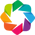

Row
    [0] Column
        [0] Row
            [0] Select(name='Category', options=['newsandmedia', ...], value='gambling')
            [1] MultiSelect(name='Websites', options=['betfair.com', ...], value=['flalottery.com', ...])
            [2] MultiSelect(name='Year', options=[2000, 2001, 2002, ...], value=[2000, 2001, 2002, ...])
        [1] ParamFunction(function, _pane=HoloViews)
    [1] ParamFunction(function, _pane=HoloViews)

In [12]:
# Testing - Dropdown interaction - improving ui. 
import panel as pn
import panel.widgets as pnw
import holoviews as hv
from holoviews import opts, dim
from bokeh.palettes import Category20c
from bokeh.models import HoverTool
import pandas as pd 
hv.extension('bokeh')

from holoviews.streams import Params
import param

from wordcloud import WordCloud
from PIL import Image
import numpy as np
from bokeh.models import FuncTickFormatter
from bokeh.models import DatetimeTickFormatter

from collections import Counter
from bokeh.models import FuncTickFormatter
from bokeh.models import YearsTicker

shorten_char = 500

# Load the data
df = corpus.to_dataframe()
# Compute word sizes for newwords and rmwords
df['add_token'] = df['add'].apply(lambda t: len(t.split(' ')))
df['rm_token'] = df['rm'].apply(lambda t: -len(t.split(' ')))
df['short_add'] = df['add'].str[:shorten_char] + np.where(df['add'].str.len() > shorten_char, '...', '')
df['short_rm'] = df['rm'].str[:shorten_char] + np.where(df['rm'].str.len() > shorten_char, '...', '')
# Convert the timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by="timestamp")

x_range = (df['timestamp'].min(), df['timestamp'].max())

# Dropdown for category selection
category_dropdown = pnw.Select(name='Category', options=df['Category'].unique().tolist(), value=df['Category'].sample(1).values[0])

# Define unique_sites and color_map
unique_sites = sorted(df['site_hostname'].unique())
color_map = {site: Category20c[20][i % 20] for i, site in enumerate(unique_sites)}

# Compute the number of unique years in the dataset
num_unique_years = len(df['timestamp'].dt.year.unique())


# MultiSelect dropdown for site_hostname selection
site_hostname_dropdown = pnw.MultiSelect(name='Websites', options=list(unique_sites), value=list(unique_sites), size=4)

# Extract unique years from df
unique_years = sorted(df['year'].unique())

# Create a dropdown for year selection
year_dropdown = pnw.MultiSelect(name='Year', options=unique_years, value=unique_years, size=4)  # default to all years


# Function to update site_hostname dropdown options based on selected category
def update_site_dropdown(category):
    relevant_sites = df[df['Category'] == category]['site_hostname'].unique().tolist()
    site_hostname_dropdown.options = sorted(relevant_sites)
    site_hostname_dropdown.value = relevant_sites

# Set initial values for site_hostname dropdown
update_site_dropdown(category_dropdown.value)

# Watch changes to category_dropdown and update site_hostname dropdown accordingly
category_dropdown.param.watch(lambda event: update_site_dropdown(event.new), 'value')

# Function to update year dropdown options based on selected category and sites
def update_year_dropdown(category, sites):
    relevant_years = df[(df['Category'] == category) & (df['site_hostname'].isin(sites))]['year'].unique().tolist()
    year_dropdown.options = sorted(relevant_years)
    year_dropdown.value = relevant_years

# Watch changes to site_hostname_dropdown and update year_dropdown accordingly
site_hostname_dropdown.param.watch(lambda event: update_year_dropdown(category_dropdown.value, event.new), 'value')

# Set the initial values for year_dropdown
update_year_dropdown(category_dropdown.value, site_hostname_dropdown.value)
    
# Refactor the function to apply filtering on the original DataFrame directly and customize the tooltip
@pn.depends(category_dropdown.param.value, site_hostname_dropdown.param.value, year_dropdown.param.value)
def update_plot_with_custom_tooltip_refactored(selected_category, selected_sites, selected_year):
    # Filter data based on selected category and site_hostnames from the original DataFrame
    
    filtered_df = df[(df['Category'] == selected_category) \
                       & (df['site_hostname'].isin(selected_sites)) \
                       & (df['year'].isin(selected_year))]
    
    # Define tooltips
    tooltips_newwords = [
        ("New Contents", "@short_add"),
        ("Time", "@timestamp{%Y-%m-%d}"),  # Adjusted format for timestamp
        ("Site", "@site_hostname")        
        ]

    tooltips_rmwords = [
        ("Removed Contents", "@short_rm"),
        ("Time", "@timestamp{%Y-%m-%d}"),  # Adjusted format for timestamp
        ("Site", "@site_hostname")
        ]
    
    # Bars for newwords with color mapping and custom tooltip
    bars_newwords = hv.Bars(
        filtered_df, kdims=['timestamp'], vdims=['add_token', 'short_add', 'site_hostname']
    ).opts(
        color=dim('site_hostname').categorize(color_map),
    tools=[HoverTool(tooltips=tooltips_newwords, formatters={'@timestamp': 'datetime'})]  # Explicitly format timestamp as datetime
    ).opts(
        xaxis='bottom',
        xformatter=FuncTickFormatter(code="return new Date(tick).getFullYear() + '-' + (new Date(tick).getMonth()+1).toString().padStart(2, '0');"),
        xrotation=45
        #xticks=YearsTicker(),
        #xlim=x_range
    )

    bars_rmwords = hv.Bars(
        filtered_df, kdims=['timestamp'], vdims=['rm_token', 'short_rm', 'site_hostname']
    ).opts(
        color=dim('site_hostname').categorize(color_map),
    tools=[HoverTool(tooltips=tooltips_rmwords, formatters={'@timestamp': 'datetime'})]  # Explicitly format timestamp as datetime
    ).opts(
        xaxis='bottom',
        xformatter=FuncTickFormatter(code="return new Date(tick).getFullYear() + '-' + (new Date(tick).getMonth()+1).toString().padStart(2, '0');"),
        xrotation=45
        #xticks=YearsTicker(),
        #xlim=x_range
    )

    
    # Overlay the two bar plots
    overlay_bars = (bars_newwords * bars_rmwords).opts(
        width=800, height=400, xlabel='Year', ylabel='Word Count Changes', show_legend=True
    ).opts(xlabel='Year')

    return overlay_bars

# Function to generate a word cloud from a dictionary and convert it to an RGB image
def generate_wordcloud_image(data_dict):
    if len(data_dict) > 1:
        wc = WordCloud(background_color='white').generate_from_frequencies(data_dict)
    else:
        wc = WordCloud(background_color='white').generate_from_frequencies({' ': 1})
    return np.array(wc.to_image())

# Function to generate a combined word cloud from a DataFrame
def generate_combined_wordcloud_image(df, column_name):
    combined_dict = Counter({})
    for index, row in df.iterrows():
        combined_dict.update(row[column_name])
    return generate_wordcloud_image(combined_dict), len(combined_dict.keys())

# Function to generate word clouds based on the current filtered DataFrame
@pn.depends(category_dropdown.param.value, site_hostname_dropdown.param.value, year_dropdown.param.value)
def display_wordclouds(selected_category, selected_sites, selected_years):
    filtered_df = df[(df['Category'] == selected_category) & (df['site_hostname'].isin(selected_sites)) & (df['year'].isin(selected_years))]
    
    # Generate word cloud images for newwords and rmwords
    newwords_image, newwords_no = generate_combined_wordcloud_image(filtered_df, 'newwords')
    rmwords_image, rmwords_no = generate_combined_wordcloud_image(filtered_df, 'rmwords')

    # Create HoloViews elements for the word clouds
    newwords_cloud = hv.RGB(newwords_image).opts(title=f'New Words: {newwords_no}', width=500, height=300)
    rmwords_cloud = hv.RGB(rmwords_image).opts(title=f'Removed Words: {rmwords_no}', width=500, height=300)

    return (newwords_cloud + rmwords_cloud).cols(1)

# Combine everything into a dashboard
layout = pn.Row(
    pn.Column(pn.Row(category_dropdown, site_hostname_dropdown, year_dropdown), update_plot_with_custom_tooltip_refactored),
    display_wordclouds
)

layout.servable()


In [13]:
# Slice a few corpora for Jux
corpora.widget()

In [14]:
gamble_add_00 = corpora['pp_add'].slicer.filter_by_datetime('timestamp', end='2009-12-31').slicer.filter_by_item('Category', 'gambling')
gamble_add_00.name = 'gamble_add_00'
gamble_add_10 = corpora['pp_add'].slicer.filter_by_datetime('timestamp', start='2010-01-01').slicer.filter_by_item('Category', 'gambling')
gamble_add_10.name = 'gamble_add_10'
news_add_00 = corpora['pp_add'].slicer.filter_by_datetime('timestamp', end='2009-12-31').slicer.filter_by_item('Category', 'newsandmedia')
news_add_00.name = 'news_add_00'
news_add_10 = corpora['pp_add'].slicer.filter_by_datetime('timestamp', start='2010-01-01').slicer.filter_by_item('Category', 'newsandmedia')
news_add_10.name = 'news_add_10'
corpora.add([gamble_add_00, gamble_add_10,news_add_00,news_add_10])


In [15]:
gamble_rm_00 = corpora['pp_rm'].slicer.filter_by_datetime('timestamp', end='2009-12-31').slicer.filter_by_item('Category', 'gambling')
gamble_rm_00.name = 'gamble_rm_00'
gamble_rm_10 = corpora['pp_rm'].slicer.filter_by_datetime('timestamp', start='2010-01-01').slicer.filter_by_item('Category', 'gambling')
gamble_rm_10.name = 'gamble_rm_10'
news_rm_00 = corpora['pp_rm'].slicer.filter_by_datetime('timestamp', end='2009-12-31').slicer.filter_by_item('Category', 'newsandmedia')
news_rm_00.name = 'news_rm_00'
news_rm_10 = corpora['pp_rm'].slicer.filter_by_datetime('timestamp', start='2010-01-01').slicer.filter_by_item('Category', 'newsandmedia')
news_rm_10.name = 'news_rm_10'
corpora.add([gamble_rm_00, gamble_rm_10,news_rm_00,news_rm_10])

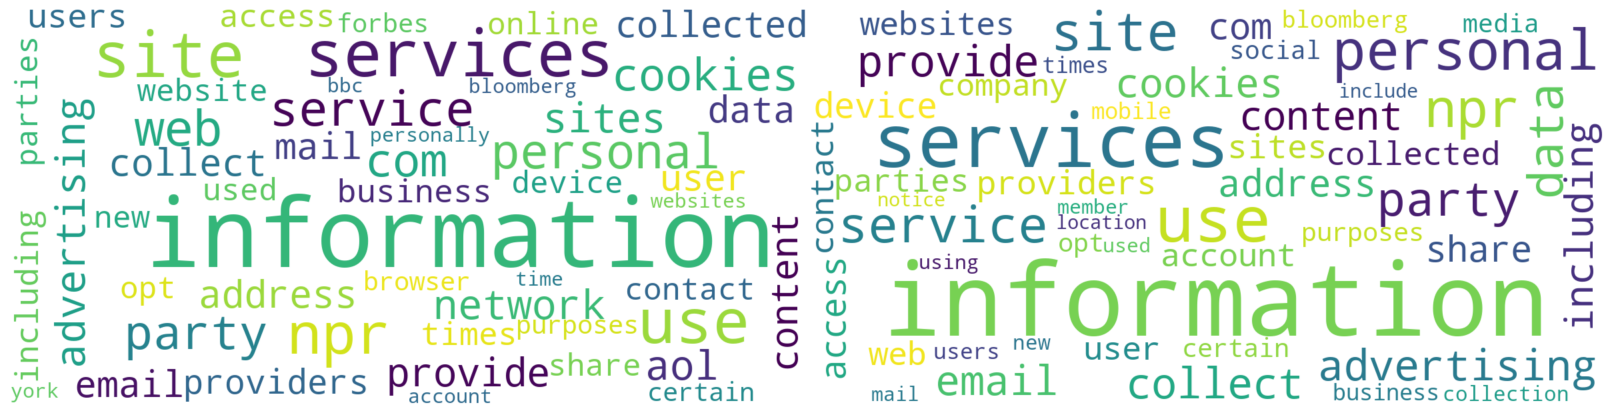

In [16]:
# Many words were added and removed over the last decade

MAXWORD = 50
METRIC = 'tfidf' # 'tf', 'tfidf', 'log_likelihood'
TYPE = 'word'

CName1 = 'news_add_10'
CName2 = 'news_rm_10'
corpora.viz.wordclouds([CName1, CName2], max_words=50, stopwords=['privacy', 'policy'])

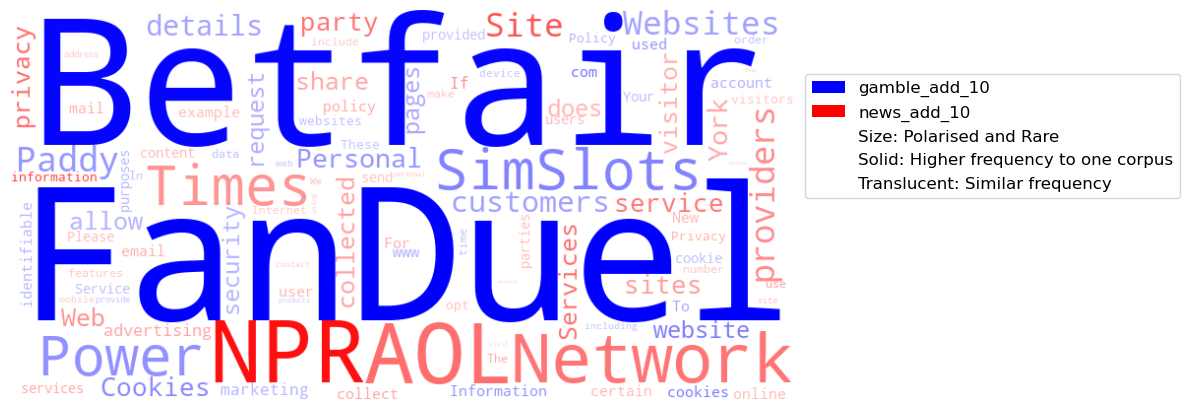

In [19]:
# Jux can reduce the words that were commonly shown (added and removed) in both corpora.
CName1 = 'gamble_add_10'
CName2 = 'news_add_10'

jux = Jux(corpora[CName1], corpora[CName2])
jux.polarity.wordcloud(metric='tf', top=100, lower=False)  # change this to 'tfidf' or 'log_likelihood'


In [20]:
def style_corpus(row, colour):
    return ['color:blue;']*len(row) if colour[row.name] else ['color:red;']*len(row)

TopN = 50

FreqTable1 = corpora[CName1].dtm.freq_table().series.rename(CName1)
FreqTable2 = corpora[CName2].dtm.freq_table().series.rename(CName2)
FT_df = pd.concat([FreqTable1, FreqTable2], axis=1, join='outer').fillna(0)

colour = FT_df[CName1] > FT_df[CName2]
print('Blue: Corpus {}; Red: Corpus {}'.format(CName1, CName2))

jux = Jux(corpora[CName1], corpora[CName2])
llv = jux.stats.log_likelihood_and_effect_size() \
    .sort_values(by='log_likelihood_llv', ascending=False)
llv.iloc[:TopN].style \
    .apply(lambda row: style_corpus(row, colour), axis=1)

Blue: Corpus gamble_add_10; Red: Corpus news_add_10


In [ ]:
# # Test Tap interaction, Breaks Holoviews.
# import panel as pn
# import panel.widgets as pnw
# import holoviews as hv
# from holoviews import opts, dim
# from bokeh.palettes import Category20c
# from bokeh.models import HoverTool
# import pandas as pd 
# hv.extension('bokeh')
# from holoviews.streams import Tap

# from holoviews.streams import Params
# from holoviews.streams import Stream

# import param

# # Define the streams for the category and site_hostnames
# class CategoryStream(Stream):
#     category = param.String()

# class SiteHostnameStream(Stream):
#     site_hostnames = param.List()


# # Load the data
# df = corpus.to_dataframe()
# # Compute word sizes for newwords and rmwords
# df['add_token'] = df['add'].apply(lambda t: len(t.split(' ')))
# df['rm_token'] = df['rm'].apply(lambda t: -len(t.split(' ')))

# # Dropdown for category selection
# category_dropdown = pnw.Select(name='Category', options=df['Category'].unique().tolist(), value=df['Category'].sample(1).values[0])

# # Define unique_sites and color_map
# unique_sites = df['site_hostname'].unique()
# color_map = {site: Category20c[20][i % 20] for i, site in enumerate(unique_sites)}

# # MultiSelect dropdown for site_hostname selection
# site_hostname_dropdown = pnw.MultiSelect(name='Websites', options=list(unique_sites), value=list(unique_sites), size=6)

# #------------
# category_stream = CategoryStream(category=category_dropdown.value)
# site_hostname_stream = SiteHostnameStream(site_hostnames=site_hostname_dropdown.value)

# # Update the streams when the dropdown values change
# def update_category_stream(event):
#     category_stream.event(category=event.new)

# def update_site_hostnames_stream(event):
#     site_hostname_stream.event(site_hostnames=event.new)

# category_dropdown.param.watch(update_category_stream, 'value')
# site_hostname_dropdown.param.watch(update_site_hostnames_stream, 'value')

# #------------

# # Function to update site_hostname dropdown options based on selected category
# def update_site_dropdown(category):
#     relevant_sites = df[df['Category'] == category]['site_hostname'].unique().tolist()
#     site_hostname_dropdown.options = relevant_sites
#     site_hostname_dropdown.value = relevant_sites

# # Set initial values for site_hostname dropdown
# update_site_dropdown(category_dropdown.value)

# # Watch changes to category_dropdown and update site_hostname dropdown accordingly
# category_dropdown.param.watch(lambda event: update_site_dropdown(event.new), 'value')

# #category_stream = Params(category_dropdown, ['value'], rename={'value': 'category_value'})
# #site_hostname_stream = Params(site_hostname_dropdown, ['value'], rename={'value': 'site_hostname_value'})
# # Sample code to demonstrate customizing the tooltip using Bokeh's HoverTool

# # Refactor the function to apply filtering on the original DataFrame directly and customize the tooltip
# @pn.depends(category_dropdown.param.value, site_hostname_dropdown.param.value)
# def update_plot_with_custom_tooltip_refactored(selected_category, selected_sites):
#     # Filter data based on selected category and site_hostnames from the original DataFrame
    
#     filtered_df = df[(df['Category'] == selected_category) & (df['site_hostname'].isin(selected_sites))]

#     # Define tooltips
#     tooltips_newwords = [
#         ("Timestamp", "@timestamp{%Y-%m-%d}"),  # Adjusted format for timestamp
#         ("Site", "@site_hostname"), 
#         ("Contents", "@add")
#         ]

#     tooltips_rmwords = [
#         ("Timestamp", "@timestamp{%Y-%m-%d}"),  # Adjusted format for timestamp
#         ("Site", "@site_hostname"), 
#         ("Contents", "@rm")
#         ]
    
#     # Bars for newwords with color mapping and custom tooltip
#     bars_newwords = hv.Bars(
#         filtered_df, kdims=['timestamp', 'site_hostname'], vdims=['add_token', 'add']
#     ).opts(
#         color=dim('site_hostname').categorize(color_map),
#     tools=[HoverTool(tooltips=tooltips_newwords, formatters={'@timestamp': 'datetime'})]  # Explicitly format timestamp as datetime
#     )
#     bars_newwords

#     bars_rmwords = hv.Bars(
#         filtered_df, kdims=['timestamp', 'site_hostname'], vdims=['rm_token', 'rm']
#     ).opts(
#         color=dim('site_hostname').categorize(color_map),
#     tools=[HoverTool(tooltips=tooltips_rmwords, formatters={'@timestamp': 'datetime'})]  # Explicitly format timestamp as datetime
#     )

    
#     # Overlay the two bar plots
#     overlay_bars = bars_newwords * bars_rmwords
    
#     return overlay_bars.opts(
#         opts.Bars(width=800, height=400, stacked=False, xlabel='Timestamp', ylabel='Word Count Changes', show_legend=False)
#     )

# # Tap stream to capture clicks on the bars
# tap_stream = Tap(source=update_plot_with_custom_tooltip_refactored, rename={'x': 'timestamp', 'y': 'tokens'})

# # Function to generate word clouds based on the tapped bar
# def generate_wordclouds(timestamp, tokens, category, site_hostnames):
#     if not timestamp:
#         return hv.Empty()  # Return an empty plot if no bar has been clicked yet

#     # Get the relevant row from the DataFrame
#     row = df[(df['timestamp'] == timestamp) & 
#              (df['Category'] == category) & 
#              (df['site_hostname'].isin(site_hostnames))].iloc[0]

#     # Create word clouds for newwords and rmwords
#     newwords_cloud = hv.WordCloud(row['newwords']).opts(title='New Words', width=400, height=400)
#     rmwords_cloud = hv.WordCloud(row['rmwords']).opts(title='Removed Words', width=400, height=400)

#     return newwords_cloud + rmwords_cloud

# # We wrap the wordclouds in a DynamicMap
# wordclouds_dmap = hv.DynamicMap(generate_wordclouds, streams=[tap_stream, category_stream, site_hostname_stream])

# # Combine everything into a dashboard
# layout = pn.Row(
#     pn.Column(category_dropdown, site_hostname_dropdown, update_plot_with_custom_tooltip_refactored),
#     wordclouds_dmap
# )

# layout.servable()
# # # Update the Panel layout with custom tooltip using Bokeh's HoverTool
# # layout_with_custom_tooltip_bokeh = pn.Column(category_dropdown, site_hostname_dropdown, update_plot_with_custom_tooltip_refactored)

# # layout_with_custom_tooltip_bokeh

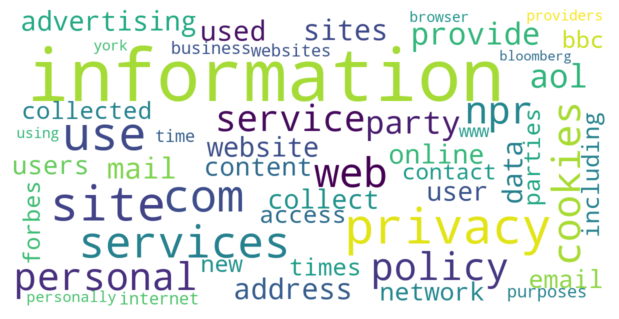

In [62]:
corpus_add.viz.wordcloud()

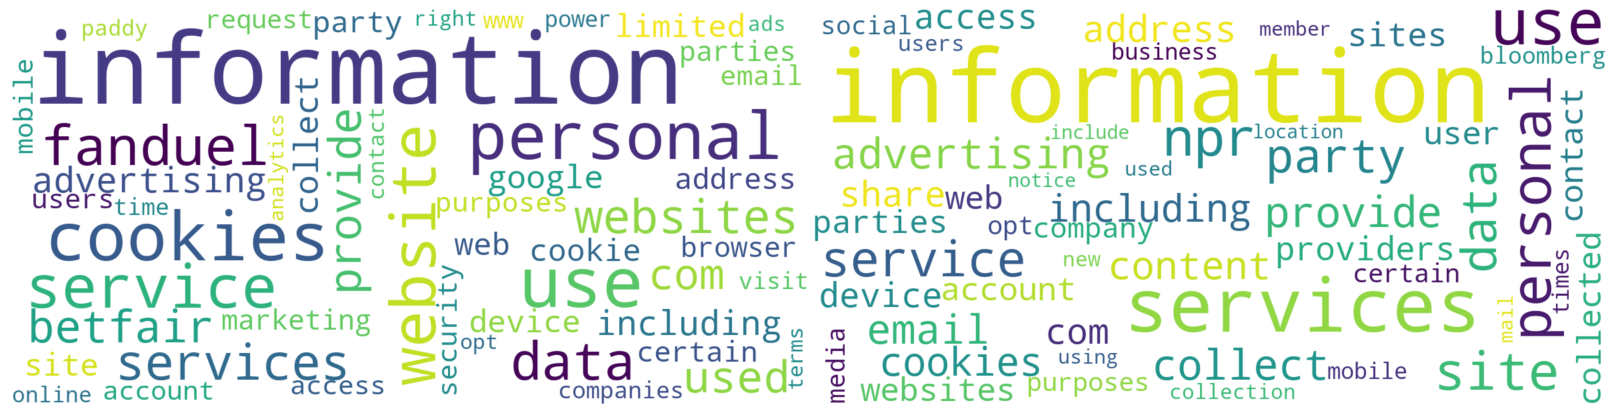

In [25]:
MAXWORD = 50
METRIC = 'tfidf' # 'tf', 'tfidf', 'log_likelihood'
TYPE = 'word'

CName1 = 'gamble_rm_10'
CName2 = 'news_rm_10'
corpora.viz.wordclouds([CName1, CName2], max_words=50, stopwords=['privacy', 'policy'])

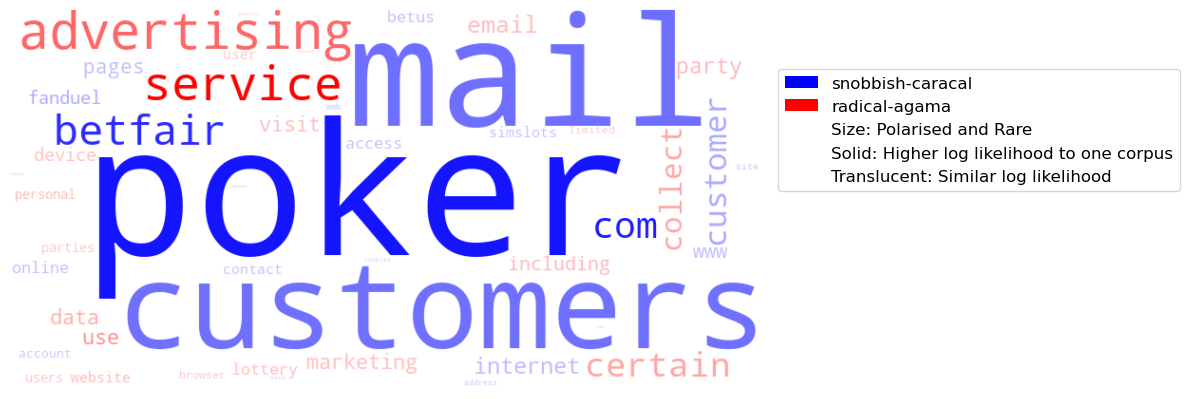

In [22]:
CName1 = 'pp_add'
CName2 = 'pp_rm'

MAXWORD = 50

add_gamble = corpora[CName1].slicer.filter_by_item('Category', 'gambling')
rm_gamble = corpora[CName2].slicer.filter_by_item('Category', 'gambling')

add_news = corpora['news_add']#.slicer.filter_by_item('Category', 'news')
rm_news = corpora['news_rm']#.slicer.filter_by_item('Category', 'news')

jux_gamble = Jux(add_gamble, rm_gamble)
jux_news = Jux(add_news, rm_news)
METRIC = 'log_likelihood' # change this to 'tfidf' or 'log_likelihood'

jux_gamble.polarity.wordcloud(metric=METRIC, top=MAXWORD, colours=('blue', 'red'), stopwords=['privacy', 'policy'])  

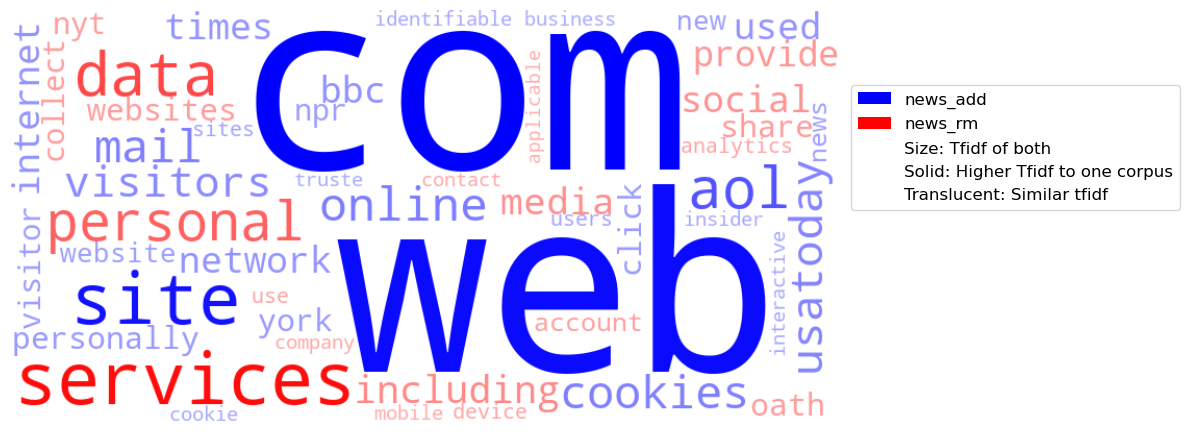

In [23]:
jux_news.polarity.wordcloud(metric='tfidf', top=MAXWORD, colours=('blue', 'red'), stopwords=['privacy', 'policy'])  

In [29]:
jux_news.polarity.log_likelihood().sort_values('log_likelihood_llv', ascending=False).head(100)

log_likelihood_llv  bayes_factor_bic  effect_size_ell   polarity
usatoday               48.570480         36.951862         0.000127  48.570480
com                    35.490146         23.871528         0.000055  35.490146
web                    33.223161         21.604543         0.000052  33.223161
your                   32.541426         20.922808         0.000043 -32.541426
alley                  30.768103         19.149485         0.000136  30.768103
...                          ...               ...              ...        ...
support                 4.799472         -6.819146         0.000022  -4.799472
consent                 4.784504         -6.834114         0.000011  -4.784504
manage                  4.679121         -6.939497         0.000012  -4.679121
personalised            4.647152         -6.971466         0.000031   4.647152
california              4.600506         -7.018112         0.000013  -4.600506

[100 rows x 4 columns]

AttributeError: type object 'DOMWidget' has no attribute '_ipython_display_'

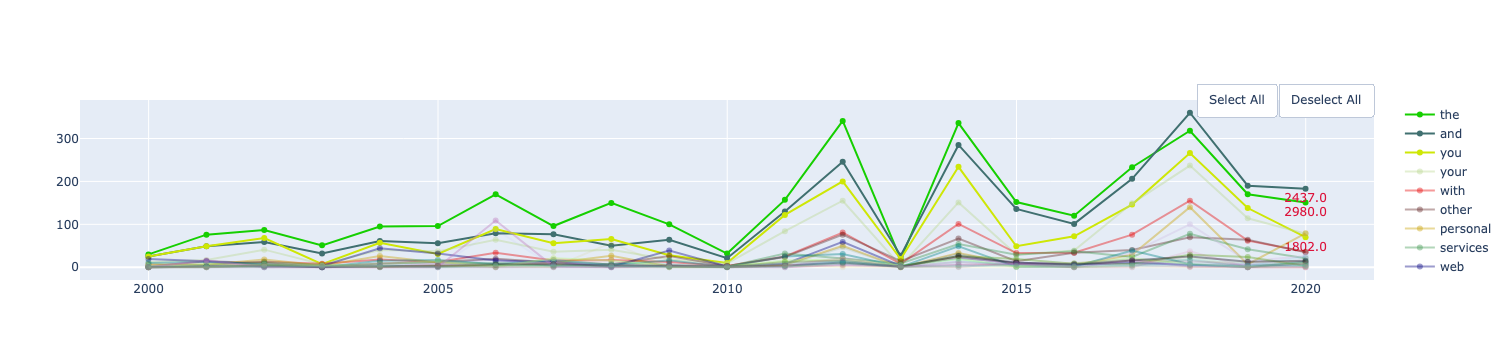

In [35]:
top_words = jux_news.polarity.log_likelihood().sort_values('log_likelihood_llv', ascending=False).head(100).index
from juxtorpus.viz.item_timeline import ItemTimeline
COL_TIME = 'timestamp'
FREQ = '1y'
whitespace = re.compile(r'\s+')

corpus = rm_news

# user defined function in creating a custom dtm (document-term-matrix)
#matcher = is_hashtag(corpus.nlp.vocab)
def extract_topwords(doc): return [w.lower() for w in whitespace.split(doc) if w.lower() in top_words]
corpus.create_custom_dtm(extract_topwords)

item_timeline = ItemTimeline.from_corpus(corpus, COL_TIME, FREQ, use_custom_dtm=True)
item_timeline.widget()

In [ ]:
corpus._df.loc[corpus._df.text_name == 'V14N002', 'text'].values[0][20:28]

In [ ]:
for idx in range(70):
    if seqmatcher.get_opcodes()[idx][0] == 'equal':
        print(idx)
        print(t1[seqmatcher.get_opcodes()[idx][1]: seqmatcher.get_opcodes()[idx][2]])
        print(t2[seqmatcher.get_opcodes()[idx][3]: seqmatcher.get_opcodes()[idx][4]])

In [ ]:
' '.join(out_rm)

<div class="alert alert-block alert-warning">
<b>What information is included in the above table?</b> 

**text_id1/2:** the text id of the pair of similar documents.
    
**text_name1/2:** the text name of the pair of similar documents.
   
**word_count1/2:** the word count of the pair of similar documents.

**status1/2:** whether to 'keep' or 'remove' each similar document.

**similarity:** the Jaccard similarity between the pair of similar documents.
</div>

In [ ]:
seqmatcher.matching_blocks

In [ ]:
for m in seqmatcher.matching_blocks:
    if 50 > m.size > 3:
        print(t1[m.a:m.a+m.size], t2[m.b:m.b+m.size])

In [ ]:
a = t1
b = t2
for i in range(len(seqmatcher.matching_blocks), 0, -1):
    m = seqmatcher.matching_blocks[i-1]
    a = a[:m.a] + a[m.a+m.size:]
    b = b[:m.a] + b[m.a+m.size:]
    

In [ ]:
b

In [ ]:
''.join(out_b)

## 5. Save duplicated/non-duplicated texts
Once you are happy with the list of texts that you want to keep, you can run the below code to save the non-duplicated texts (those with 'keep' status) or the duplicated ones (those with 'remove' status) into a zip of text (.txt) files and download them to your local computer.

In [ ]:
rows_to_display=5

ds.finalise_and_save(rows_to_display)

In [ ]:
from markdown_it import MarkdownIt
from mdit_plain.renderer import RendererPlain
from pathlib import Path
import pandas as pd
import json
import re

def load_meta(path):
    meta_path = Path(path.as_posix() +'.logmsg')
    content = meta_path.read_text().replace('*', '').strip()
    json_start = content.find('{')
    meta_data = json.loads(content[json_start:].replace('\n', ''))
    return meta_data
    

def md2txt(md_data):
    parser = MarkdownIt(renderer_cls=RendererPlain)
    txt_data = parser.render(md_data)
    return txt_data

def privacy_data_loader(input_dir):
    paths = []
    policies = []
    for path in Path(input_dir).rglob('*.*'):
        paths.append(path)
        if path.name.endswith('.logmsg') or path.name.startswith('.'):
            continue
        temp = load_meta(path)
        web, meta = path.name.split('.md.')
        temp['website'] = web
        temp['version'], temp['rev'] = meta.split('.')
        temp['text'] = md2txt(path.read_text())
        policies.append(temp)
    df = pd.DataFrame.from_dict(policies)
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y%m%d%H%M%S')
    return paths, df
    
files, df = privacy_data_loader('../data/top500')
df.text = df.text.apply(lambda t: t.split('\n', 1)[1].strip())

df.to_excel('../data/top500_privacy.xlsx', index=False)

In [ ]:
df.shape
#len(df.website.unique())

In [ ]:
# Generate list of commands to execute
websites = [
    'aol.com',
    'bbc.co.uk',
    'nytimes.com',
    'huffingtonpost.com',
    'forbes.com',
    'businessinsider.com',
    'theepochtimes.com',
    'usatoday.com',
    'bloomberg.com',
    'news.com.au',
    'npr.org',
    'freelotto.com',
    'lotterypost.com',
    'betfair.com',
    'fanduel.com',
    'betus.com',
    'twoplustwo.com',
    'flalottery.com',
    'powerball.com',
    'freeslots.com',
    'pokerlistings.com'
]

with open('top500.txt', 'r') as f:
    websites = f.readlines()
commands = []
for w in websites:
    command = f'sh git_all_versions_of_new.sh ./{w[0]}/{w[0:2]}/{w[0:3]}/{w}.md ./export/'
    commands.append(command)
print('\n'.join(commands))

In [ ]:
type(meta)

In [ ]:
t = 'aol.com'
t[0:2]

In [ ]:
a = [1,2,4,2,3,1]
a.index(2)

In [ ]:
a.remove(2)

In [ ]:
a

In [19]:
import pandas as pd
import panel as pn
import panel.widgets as pnw
import holoviews as hv
from holoviews import opts, streams
import param 

# Load data
df = pd.read_json("../Juxtorpus/test.json")
# Dropdowns
category_dropdown = pnw.Select(name='Category', options=df['Category'].unique().tolist())
site_hostname_dropdown = pnw.MultiSelect(name='Websites', options=[])

@pn.depends(category_dropdown.param.value)
def update_sites(category):
    return df[df['Category'] == category]['site_hostname'].unique().tolist()

site_hostname_dropdown.options = update_sites(category_dropdown.value)
category_dropdown.param.watch(lambda event: setattr(site_hostname_dropdown, 'options', update_sites(event.new)), 'value')

# Create explicit streams for category and site_hostnames
class CategoryStream(streams.Stream):
    category = param.String()

class SiteHostnameStream(streams.Stream):
    site_hostnames = param.List()

# Instantiate the streams and link them to the widgets
category_stream = CategoryStream(category=category_dropdown.value)
site_hostname_stream = SiteHostnameStream(site_hostnames=site_hostname_dropdown.value)

def _update_category(event):
    category_stream.event(category=event.new)

def _update_site_hostnames(event):
    site_hostname_stream.event(site_hostnames=event.new)

# Setting up the watchers
category_dropdown.param.watch(_update_category, 'value')
site_hostname_dropdown.param.watch(_update_site_hostnames, 'value')

# Adjust the plot_bars function to match the stream parameter names
@pn.depends(category_stream.param.category, site_hostname_stream.param.site_hostnames)
def plot_bars(category, site_hostnames):
    filtered_df = df[(df['Category'] == category) & (df['site_hostname'].isin(site_hostnames))]
    filtered_df['add_length'] = filtered_df['new_key'].apply(len)
    filtered_df['rm_length'] = -filtered_df['rm_key'].apply(len)
    
    bars_add = hv.Bars(filtered_df, kdims=['timestamp'], vdims=['add_length', 'site_hostname']).opts(color='site_hostname', tools=['hover', 'tap'])
    bars_rm = hv.Bars(filtered_df, kdims=['timestamp'], vdims=['rm_length', 'site_hostname']).opts(color='site_hostname', tools=['hover', 'tap'])
    
    return (bars_add * bars_rm).opts(width=500, height=400, shared_axes=False)

dmap_bars = hv.DynamicMap(plot_bars, streams=[category_stream, site_hostname_stream])

# Word Clouds
tap_stream = streams.Tap(source=dmap_bars)

@pn.depends(tap_stream.param.x, category_stream.param.category, site_hostname_stream.param.site_hostnames)
def plot_wordclouds(x, category, site_hostnames):
    if x is None:
        return "Click on a bar to view word clouds."
    
    timestamp = x
    row = df[(df['timestamp'] == timestamp) & (df['Category'] == category) & (df['site_hostname'].isin(site_hostnames))].iloc[0]
    add_dict = dict(zip(row['new_key'], row['new_value']))
    rm_dict = dict(zip(row['rm_key'], row['rm_value']))
    
    add_cloud = hv.WordCloud(add_dict).opts(title='Added Keywords', width=400, height=400)
    rm_cloud = hv.WordCloud(rm_dict).opts(title='Removed Keywords', width=400, height=400)
    
    return add_cloud + rm_cloud

# Dashboard
left_pane = pn.Column(category_dropdown, site_hostname_dropdown, dmap_bars)
right_pane = plot_wordclouds
dashboard = pn.Row(left_pane, right_pane)

dashboard.servable()


Row
    [0] Column
        [0] Select(name='Category', options=['gambling', '...], value='gambling')
        [1] MultiSelect(name='Websites', options=['twoplustwo.com', ...])
        [2] HoloViews(DynamicMap, height=400, sizing_mode='fixed', width=500)
    [1] ParamFunction(function, _pane=Markdown)

In [97]:
category_dropdown.value = df['Category'].iloc[0]  # Set default values for testing
site_hostname_dropdown.value = [df['site_hostname'].iloc[0]]

plot_bars(category_dropdown.value, site_hostname_dropdown.value)


AttributeError: 'function' object has no attribute '_plot_id'

:Overlay
   .Bars.I  :Bars   [timestamp]   (add_length,site_hostname)
   .Bars.II :Bars   [timestamp]   (rm_length,site_hostname)

In [98]:
tap_stream.x = df['timestamp'].iloc[0]
plot_wordclouds(tap_stream.x, category_dropdown.value, site_hostname_dropdown.value)


TypeError: Constant parameter 'x' cannot be modified

In [20]:
df = corpus.to_dataframe()
import panel as pn
import panel.widgets as pnw
import holoviews as hv
from holoviews import opts, streams
import pandas as pd
import param


# Dropdowns
category_dropdown = pnw.Select(name='Category', options=df['Category'].unique().tolist())
site_hostname_dropdown = pnw.MultiSelect(name='Websites', options=[])

@pn.depends(category_dropdown.param.value)
def update_sites(category):
    return df[df['Category'] == category]['site_hostname'].unique().tolist()

site_hostname_dropdown.options = update_sites(category_dropdown.value)
category_dropdown.param.watch(lambda event: setattr(site_hostname_dropdown, 'options', update_sites(event.new)), 'value')

# Create explicit streams for category and site_hostnames
class CategoryStream(streams.Stream):
    category = param.String()

class SiteHostnameStream(streams.Stream):
    site_hostnames = param.List()

# Instantiate the streams and link them to the widgets
category_stream = CategoryStream(category=category_dropdown.value)
site_hostname_stream = SiteHostnameStream(site_hostnames=site_hostname_dropdown.value)

@category_dropdown.param.watch('value')
def _update_category(value, old_value, **kwargs):
    category_stream.event(category=value)
    
@site_hostname_dropdown.param.watch('value')
def _update_site_hostnames(value, old_value, **kwargs):
    site_hostname_stream.event(site_hostnames=value)

# Adjust the plot_bars function to match the stream parameter names
@pn.depends(category_stream.param.category, site_hostname_stream.param.site_hostnames)

def plot_bars(category, site_hostnames):
    filtered_df = df[(df['Category'] == category) & (df['site_hostname'].isin(site_hostnames))]
    
    filtered_df['add_length'] = filtered_df['add'].apply(lambda t: len(t.split(' ')))
    filtered_df['rm_length'] = -filtered_df['rm'].apply(lambda t: len(t.split(' ')))
    
    bars_add = hv.Bars(filtered_df, kdims=['timestamp'], vdims=['add_length', 'site_hostname']).opts(color='site_hostname', tools=['hover', 'tap'])
    bars_rm = hv.Bars(filtered_df, kdims=['timestamp'], vdims=['rm_length', 'site_hostname']).opts(color='site_hostname', tools=['hover', 'tap'])
    
    return (bars_add * bars_rm).opts(width=500, height=400, shared_axes=False)


dmap_bars = hv.DynamicMap(plot_bars, streams=[category_dropdown.param.value, site_hostname_dropdown.param.value])

# Word Clouds
tap_stream = streams.Tap(source=dmap_bars)

@pn.depends(tap_stream.param.x, category_dropdown.param.value, site_hostname_dropdown.param.value)
def plot_wordclouds(x, category, site_hostnames):
    if x is None:
        return "Click on a bar to view word clouds."
    
    timestamp = x
    row = df[(df['timestamp'] == timestamp) & (df['Category'] == category) & (df['site_hostname'].isin(site_hostnames))].iloc[0]
    add_dict = row['newwords']
    rm_dict = row['rmwords']
    
    add_cloud = hv.WordCloud(add_dict).opts(title='Added Keywords', width=400, height=400)
    rm_cloud = hv.WordCloud(rm_dict).opts(title='Removed Keywords', width=400, height=400)
    
    return add_cloud + rm_cloud

# Dashboard
left_pane = pn.Column(category_dropdown, site_hostname_dropdown, dmap_bars)
right_pane = plot_wordclouds
dashboard = pn.Row(left_pane, right_pane)

dashboard.servable()

TypeError: Parameters.watch() missing 1 required positional argument: 'parameter_names'

In [82]:
corpus.to_dataframe().head()

document  \
0  Two Plus Two Forums Privacy Policy\n\nThis pri...   
1  BBC - Privacy Policy\n\nPrivacy Policy\nThe fo...   
2  NASA Sportsbook - Offshore Betting\n\nBetUS.co...   
3  BBC - Privacy and Cookies Policy\n\n1. Introdu...   
4  Two Plus Two Forums Privacy Policy\n\nThis pri...   

                                                 add  \
0                                                      
1  (eg name newsletters and competitions, live ch...   
2                                                      
3                                                      
4                                                      

                                                  rm  alexa_rank  \
0                                                         5002.0   
1  (e.g. name newsletters, competitions, "Alert E...         NaN   
2                                                            NaN   
3                                                           47.0   
4                                                         3877.0   

       Category  flesch_kincaid phase                        policy_title  \
0      gambling           13.15     A  Two Plus Two Forums Privacy Policy   
1  newsandmedia            7.41     B                BBC - Privacy Policy   
2      gambling           10.98     B  NASA Sportsbook - Offshore Betting   
3  newsandmedia           12.91     A    BBC - Privacy and Cookies Policy   
4      gambling           13.15     A  Two Plus Two Forums Privacy Policy   

    site_hostname           timestamp  word_count  year  version  \
0  twoplustwo.com 2009-06-18 12:31:07        2290  2009       22   
1       bbc.co.uk 2002-12-08 09:31:35        1496  2002       18   
2       betus.com 2003-12-06 07:29:54         240  2003       26   
3       bbc.co.uk 2009-06-19 21:03:00        2605  2009        6   
4  twoplustwo.com 2011-06-26 02:31:06        2290  2011       18   

                                            newwords  \
0                                                 {}   
1  {'1998': 1, '1aa': 1, '2001': 1, '2002': 1, 'a...   
2  {'absolute': 1, 'access': 1, 'account': 2, 'ad...   
3  {'1998': 1, '1st': 1, '2009': 1, 'able': 4, 'a...   
4                                                 {}   

                                             rmwords  
0  {'ads': 1, 'advertisements': 2, 'beacon': 1, '...  
1  {'201': 1, '2252': 1, '7ts': 1, 'account': 1, ...  
2  {'23887': 1, '888': 1, 'about': 1, 'adhering':...  
3  {'alert': 1, 'answers': 1, 'asked': 1, 'bbcid'...  
4  {'ads': 1, 'advertisements': 2, 'beacon': 1, '...